Bitcoin Price Analysis:
Loading the data:

There are 23 numeric and 0 categorical columns in train data


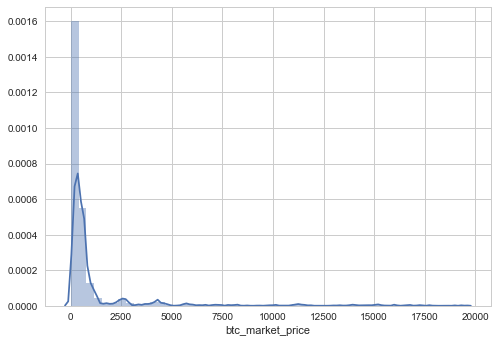

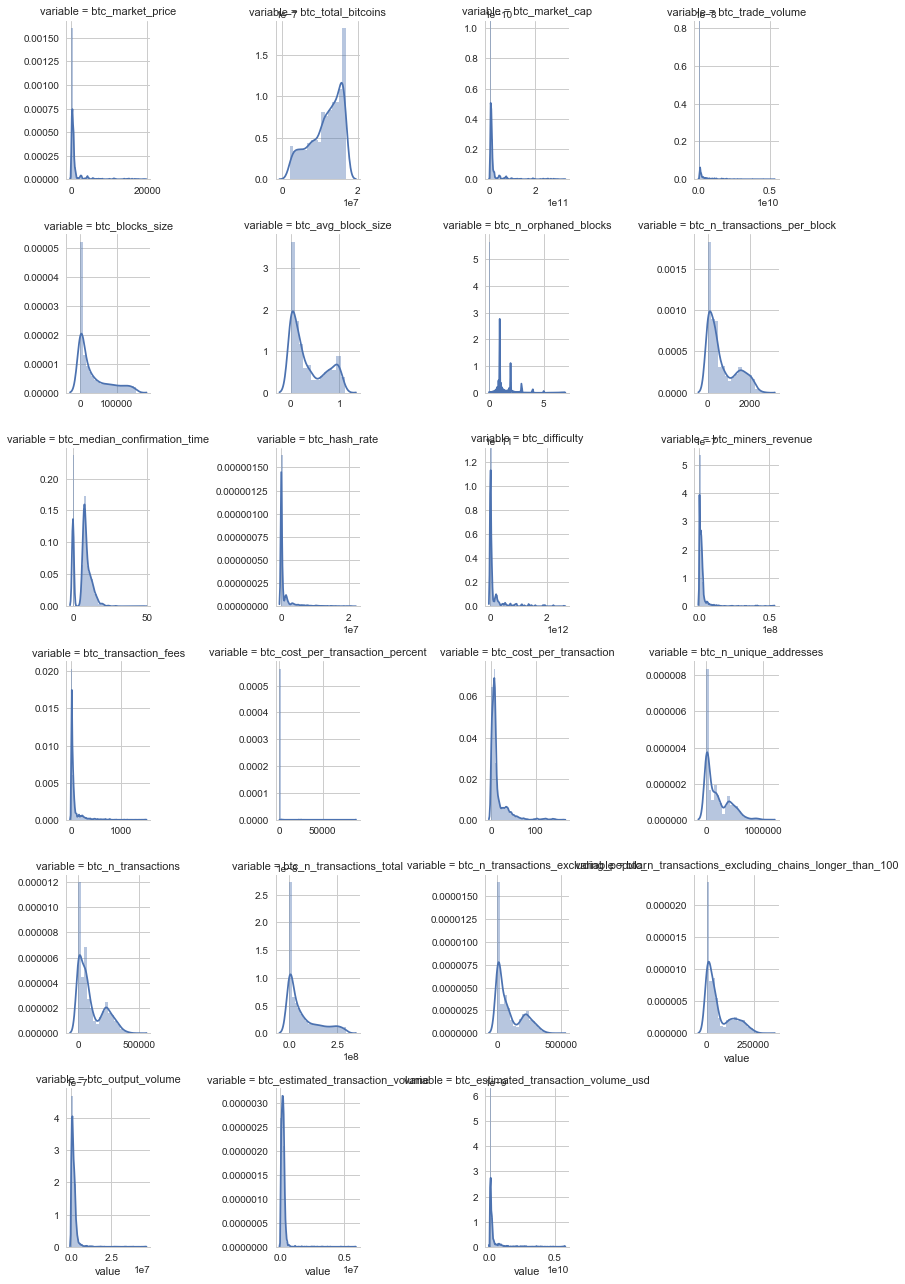

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime
from scipy import stats
from scipy.stats import norm


train = pd.read_csv('https://raw.githubusercontent.com/colaberry/data/master/Bitcoin/bitcoin_dataset.csv',encoding='utf-8',index_col=0)
test = pd.read_csv('https://raw.githubusercontent.com/colaberry/data/master/Bitcoin/test_set.csv')
train.head()


sns.distplot(train['btc_market_price'])

#create numeric plots
num = [f for f in train.columns if train.dtypes[f] != 'object']

nd = pd.melt(train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1


#separate variables into new data frames
numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))



Predicting the Price of Bitcoin:

btc_market_price                                       1.000000
btc_market_cap                                         0.999783
btc_miners_revenue                                     0.986732
btc_estimated_transaction_volume_usd                   0.968308
btc_hash_rate                                          0.920876
btc_difficulty                                         0.916937
btc_trade_volume                                       0.868813
btc_cost_per_transaction                               0.815507
btc_transaction_fees                                   0.806595
btc_n_transactions_total                               0.680048
btc_blocks_size                                        0.674507
btc_n_unique_addresses                                 0.663917
btc_n_transactions                                     0.569603
btc_n_transactions_excluding_chains_longer_than_100    0.567281
btc_n_transactions_excluding_popular                   0.558416
Name: btc_market_price, dtype: float64 


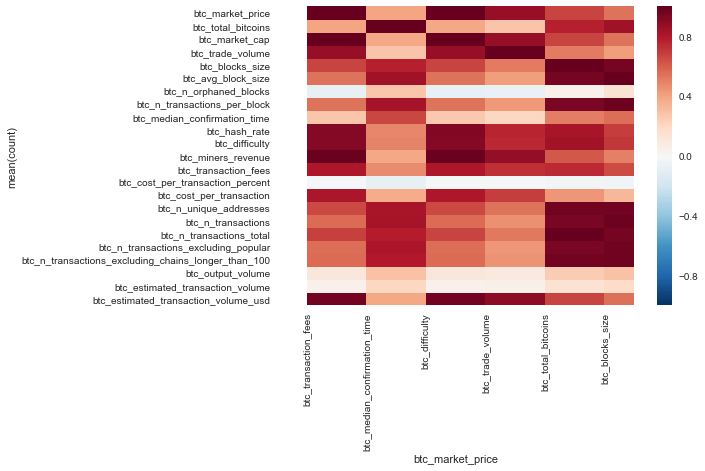

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [28]:

#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr)

print (corr['btc_market_price'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['btc_market_price'].sort_values(ascending=False)[-5:]) #last 5 values`

#missing value counts in each of these columns
miss = train.isnull().sum()/len(train)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

#visualising missing values
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['btc_market_price']
miss['btc_market_price'] = miss.index

#plot the missing value count
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'btc_market_price', y = 'count', data=miss)
plt.xticks(rotation = 90)
sns.plt.show()
from sklearn.linear_model import Lasso


#fitting model

best_alpha = 0.00099

regr = Lasso(alpha=best_alpha, max_iter=50000)
regr.fit(train,train.btc_market_price)


y_pred = regr.predict(train)
y_test = btc_market_price
print("Lasso score on training set: ", rmse(y_test, y_pred))
